In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
#own functions
import functions as f

#accessing aws data
import sys
sys.path.append('../utils')
from db_utils import DBUtil 

#for ipython display
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [2]:
#connect to aws
dbu = DBUtil("komodo_redshift","../../databases/database.conf")

In [3]:
%%time
query = """
select ilink,
count(*) as N_WovenShirts2018 
from jjill.jjill_keyed_data
where is_emailable_ind='Y'
and department_name = 'Woven Shirts'
and order_date between '2018-01-01' and '2018-04-30'
group by 1 order by 1;
"""
DF3 = dbu.get_df_from_query(query)
DF3.columns = map(str.upper,DF3.columns)

CPU times: user 172 ms, sys: 65.2 ms, total: 237 ms
Wall time: 4.47 s


In [4]:
DF1 = pd.read_pickle('../data/numeric_fts_2017.pkl')
DF2 = pd.read_pickle('../data/categorical2017.pkl')
DF1.columns = map(str.upper, DF1.columns)
DF2.columns = map(str.upper, DF2.columns)

In [5]:
DF = DF1.merge(DF2,on=['ILINK','DEPARTMENT_NAME'])
DF = DF.merge(DF3,how='outer',on='ILINK')

In [6]:
DF['N_WOVENSHIRTS2018'].fillna(0,inplace=True)

In [8]:
DF4 = DF[DF.DEPARTMENT_NAME=='Woven Shirts']
X = ['%s_2017'%x for x in DF4.columns[2:-1]]
X.insert(0,'ILINK')
X.insert(1,'DEPARTMENT_NAME')
X.insert(42,'N_WOVENSHIRTS2018')
DF4.columns = X
print 'Distinct # of Customers in who purchased Woven Shirts in 2017:',DF4.shape[0]

Distinct # of Customers in who purchased Woven Shirts in 2017: 47655


In [9]:
NUMERIC_FTS = ['TOTAL_BOUGHT_2017',
             'SHIPPED_SOLD_AMT_2017',
             'AVG_SHIPPED_SOLD_AMT_2017',
             'STD_SHIPPED_SOLD_AMT_2017',
             'VAR_SHIPPED_SOLD_AMT_2017',
             'DISCOUNT_2017',
             'AVG_DISCOUNT_2017',
             'STD_DISCOUNT_2017',
             'VAR_DISCOUNT_2017',
             'N_WOVENSHIRTS2018']
CATEG_FTS = ['ENDUSE_HAS_CORE_2017',
             'ENDUSE_HAS_WEAREVER_2017',
             'ENDUSE_HAS_PUREJILL_2017',
             'PAYTYPE_HAS_JJC_2017',
             'PAYTYPE_HAS_VISA_2017',
             'PAYTYPE_HAS_MC_2017',
             'PAYTYPE_HAS_AMEX_2017',
             'PAYTYPE_HAS_DISC_2017',
             'PAYTYPE_HAS_DEBIT_2017',
             'PAYTYPE_HAS_CASH_2017',
             'PAYTYPE_HAS_CK_2017',
             'PAYTYPE_HAS_OTHER_2017',
             'FABRICCATEGORY_HAS_COTTON/COTTONBL_2017',
             'FABRICCATEGORY_HAS_SYNTHETIC/SYNBLEND_2017',
             'FABRICCATEGORY_HAS_LINEN/LINENBL_2017',
             'ENDUSE_%_CORE_2017',
             'ENDUSE_%_WEAREVER_2017',
             'ENDUSE_%_PUREJILL_2017',
             'PAYTYPE_%_JJC_2017',
             'PAYTYPE_%_VISA_2017',
             'PAYTYPE_%_MC_2017',
             'PAYTYPE_%_AMEX_2017',
             'PAYTYPE_%_DISC_2017',
             'PAYTYPE_%_DEBIT_2017',
             'PAYTYPE_%_CASH_2017',
             'PAYTYPE_%_CK_2017',
             'PAYTYPE_%_OTHER_2017',
             'FABRICCATEGORY_%_COTTON/COTTONBL_2017',
             'FABRICCATEGORY_%_SYNTHETIC/SYNBLEND_2017',
             'FABRICCATEGORY_%_LINEN/LINENBL_2017','N_WOVENSHIRTS2018']
CATEG_FTS = map(str.upper,CATEG_FTS)

# Woven Shirts Customers Only

## Numeric Fts Correlations/Scatter Matrix

,TOTAL_BOUGHT_2017,N_WOVENSHIRTS2018
TOTAL_BOUGHT_2017,1.000000,0.391175
N_WOVENSHIRTS2018,0.391175,1.000000


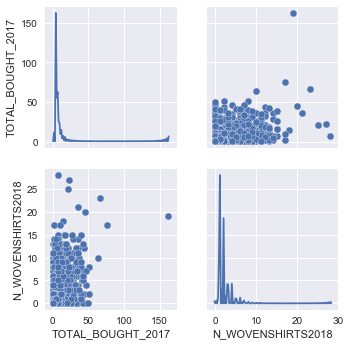

In [10]:
fts = [NUMERIC_FTS[0]]+['N_WOVENSHIRTS2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,SHIPPED_SOLD_AMT_2017,AVG_SHIPPED_SOLD_AMT_2017,STD_SHIPPED_SOLD_AMT_2017,VAR_SHIPPED_SOLD_AMT_2017,N_WOVENSHIRTS2018
SHIPPED_SOLD_AMT_2017,1.000000,0.200644,0.178802,0.079277,0.365686
AVG_SHIPPED_SOLD_AMT_2017,0.200644,1.000000,0.062205,0.066983,-0.027457
STD_SHIPPED_SOLD_AMT_2017,0.178802,0.062205,1.000000,0.912497,0.061848
VAR_SHIPPED_SOLD_AMT_2017,0.079277,0.066983,0.912497,1.000000,0.015369
N_WOVENSHIRTS2018,0.365686,-0.027457,0.061848,0.015369,1.000000


/Users/alexanderpan/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/alexanderpan/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


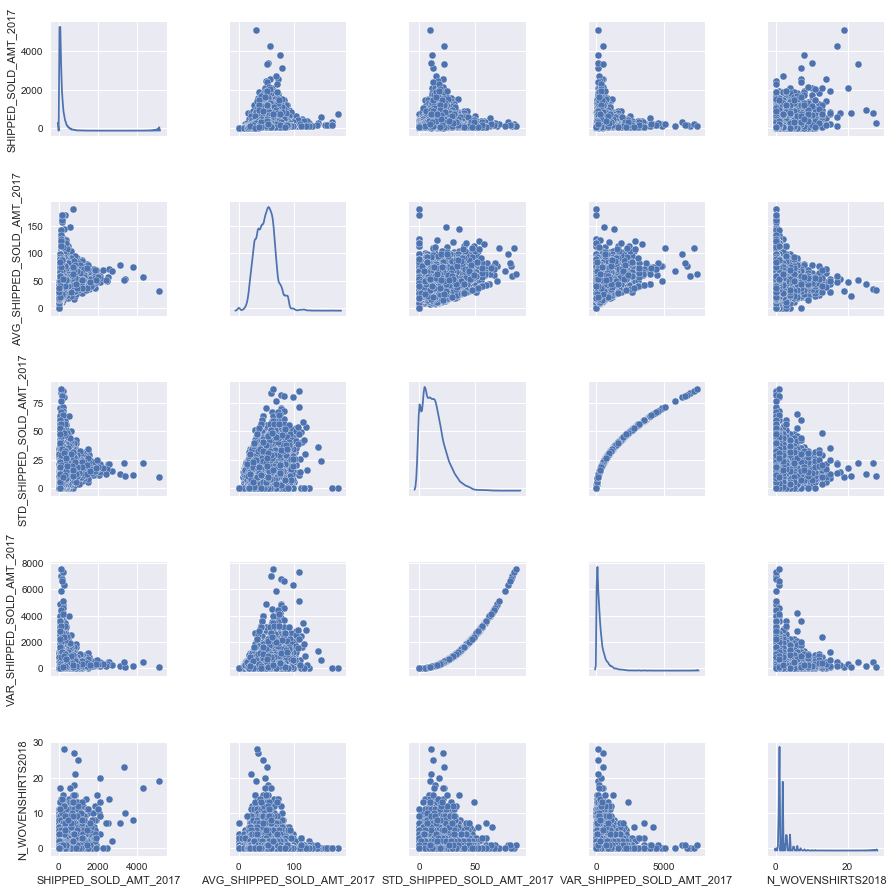

In [11]:
fts = NUMERIC_FTS[1:5]+['N_WOVENSHIRTS2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,DISCOUNT_2017,AVG_DISCOUNT_2017,STD_DISCOUNT_2017,VAR_DISCOUNT_2017,N_WOVENSHIRTS2018
DISCOUNT_2017,1.000000,0.264633,0.133700,0.046652,0.381584
AVG_DISCOUNT_2017,0.264633,1.000000,-0.049734,-0.019218,0.030262
STD_DISCOUNT_2017,0.133700,-0.049734,1.000000,0.907736,0.075202
VAR_DISCOUNT_2017,0.046652,-0.019218,0.907736,1.000000,0.027613
N_WOVENSHIRTS2018,0.381584,0.030262,0.075202,0.027613,1.000000


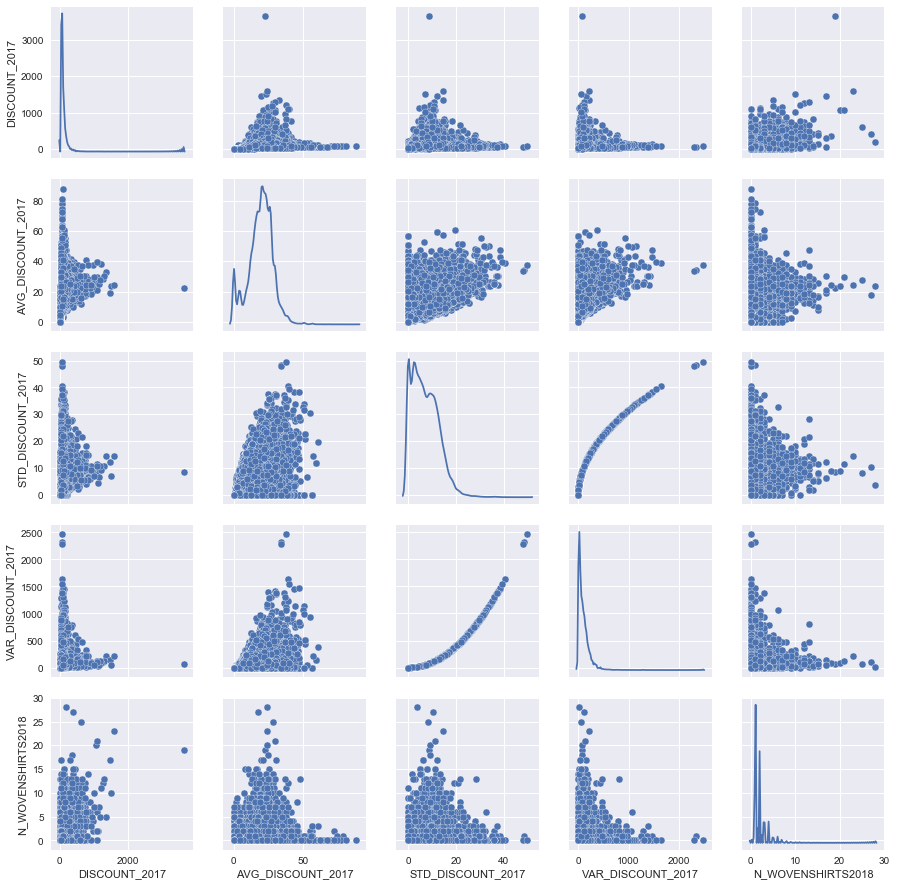

In [12]:
fts = NUMERIC_FTS[5:]
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

## Categorical Fts Correlation/Scatter Matrix

/Users/alexanderpan/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/alexanderpan/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/alexanderpan/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


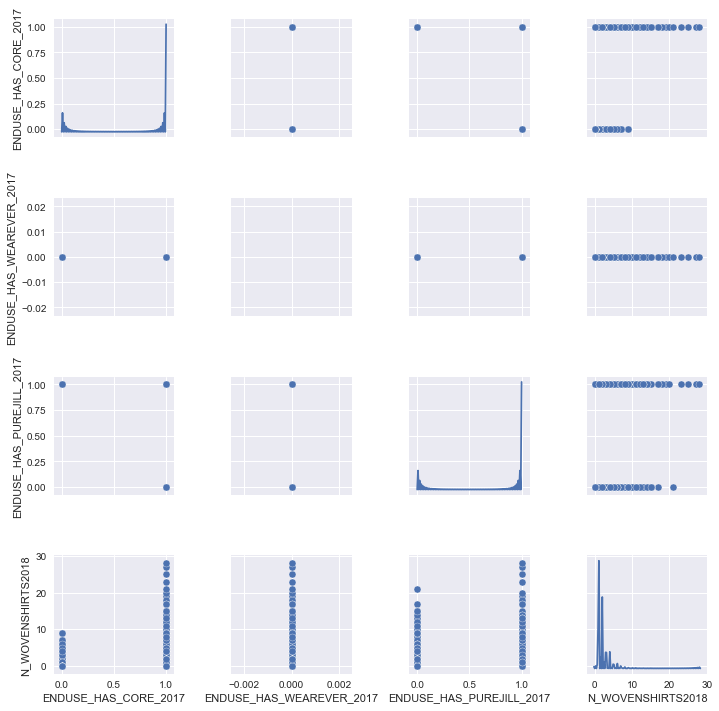

In [13]:
fts = CATEG_FTS[0:3]+['N_WOVENSHIRTS2018']
#display(DFPants[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

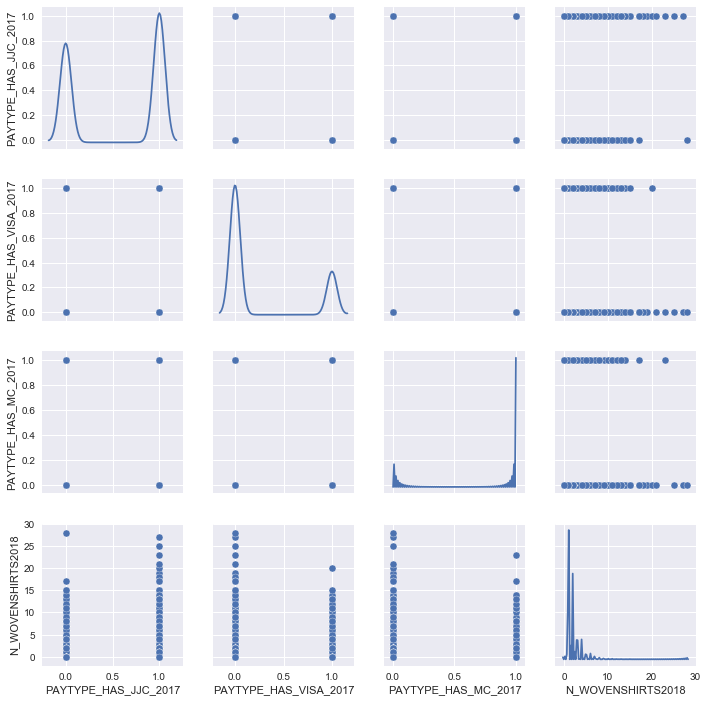

In [14]:
fts = CATEG_FTS[3:6]+['N_WOVENSHIRTS2018']
#display(DFPants[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

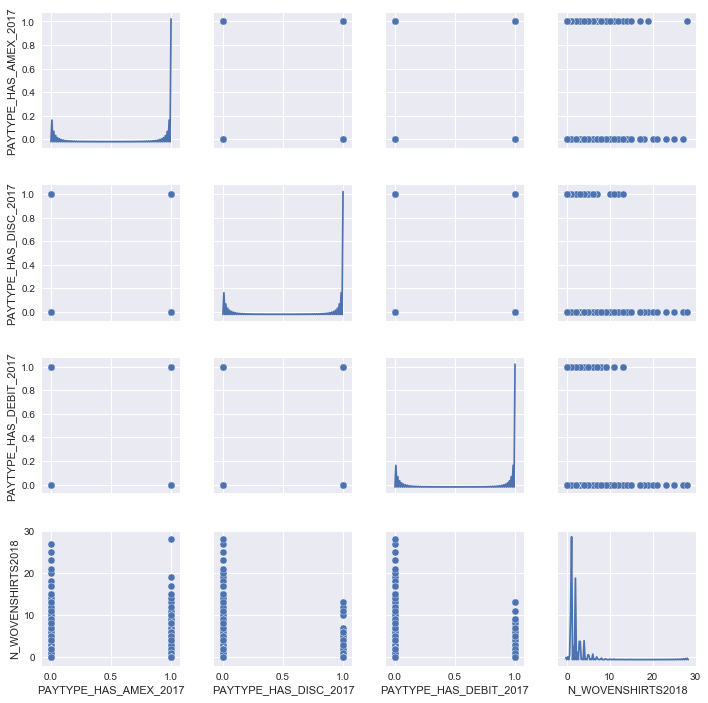

In [15]:
fts = CATEG_FTS[6:9]+['N_WOVENSHIRTS2018']
#display(DFPants[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

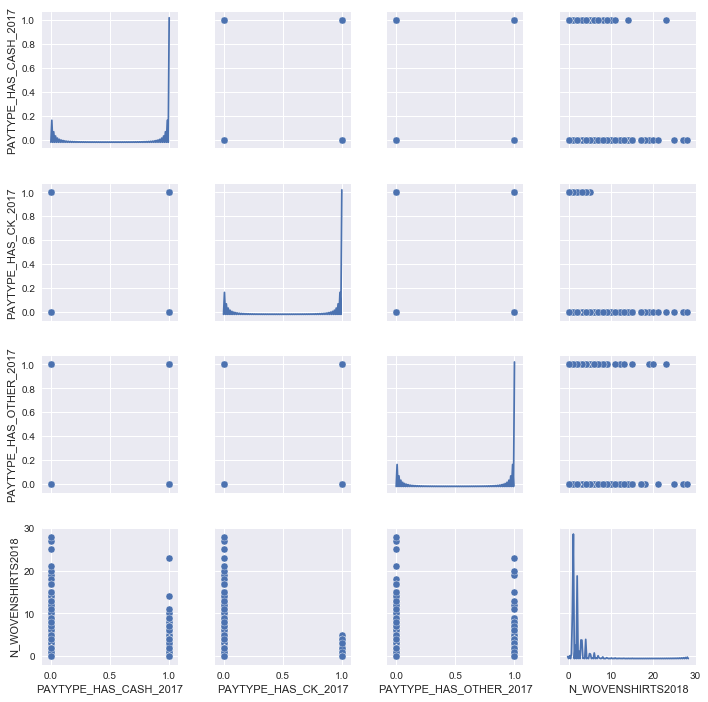

In [16]:
fts = CATEG_FTS[9:12]+['N_WOVENSHIRTS2018']
#display(DFPants[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

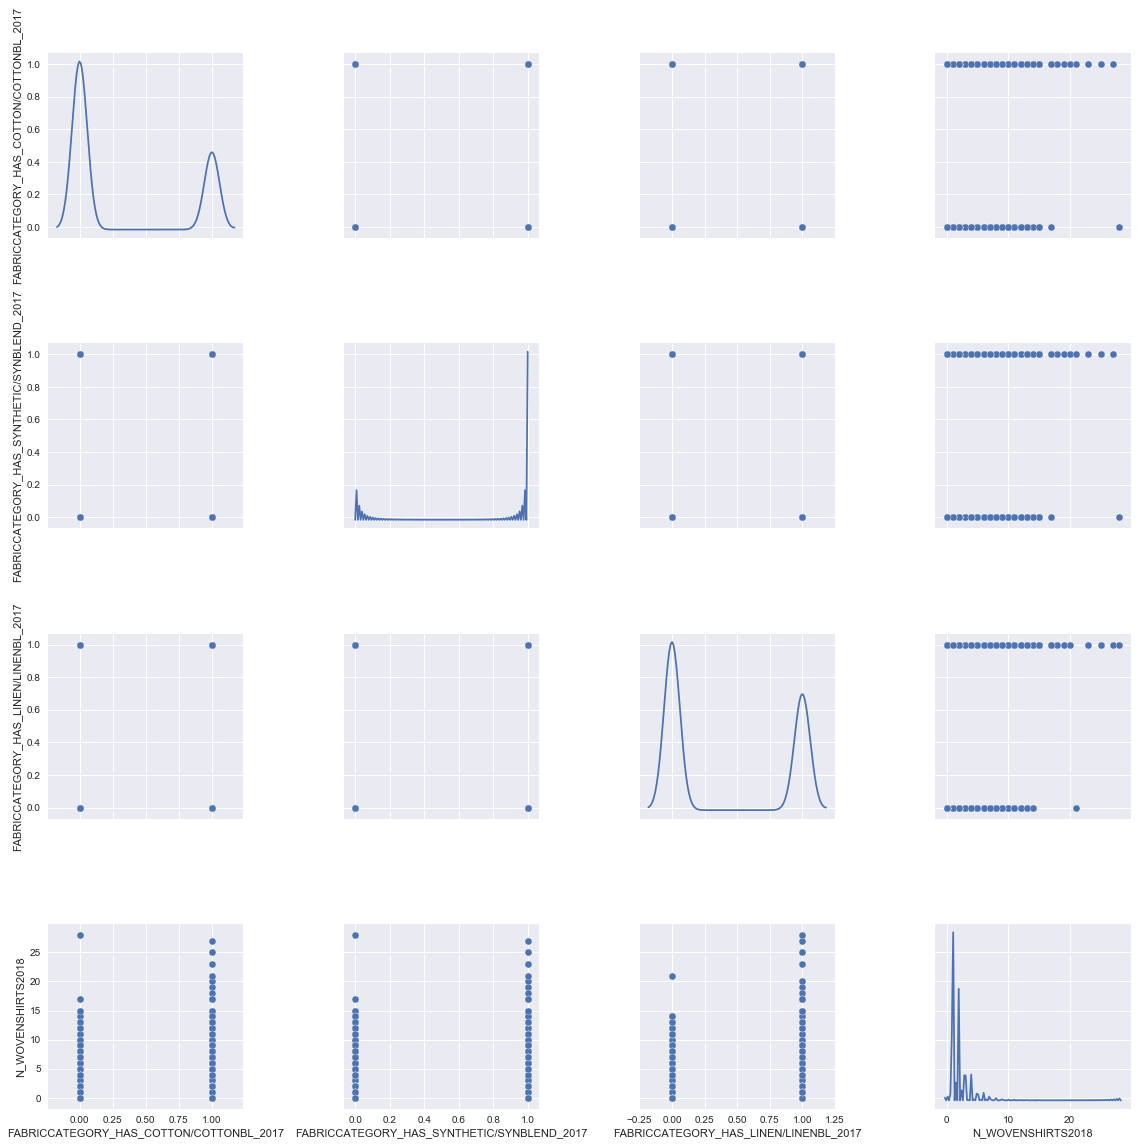

In [17]:
fts = CATEG_FTS[12:15]+['N_WOVENSHIRTS2018']
#display(DFPants[fts].corr())
g = sns.pairplot(DF4,vars=fts,diag_kind='kde',size=4);

,ENDUSE_%_CORE_2017,ENDUSE_%_WEAREVER_2017,ENDUSE_%_PUREJILL_2017,N_WOVENSHIRTS2018
ENDUSE_%_CORE_2017,1.000000,NaN,-1.000000,0.000351
ENDUSE_%_WEAREVER_2017,NaN,NaN,NaN,NaN
ENDUSE_%_PUREJILL_2017,-1.000000,NaN,1.000000,-0.000345
N_WOVENSHIRTS2018,0.000351,NaN,-0.000345,1.000000


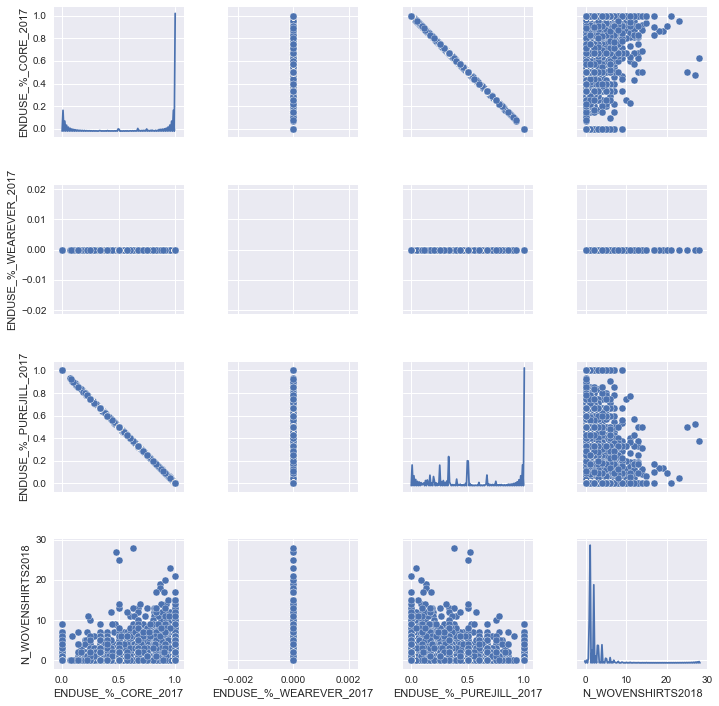

In [18]:
fts = CATEG_FTS[15:18]+['N_WOVENSHIRTS2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,PAYTYPE_%_JJC_2017,PAYTYPE_%_VISA_2017,PAYTYPE_%_MC_2017,N_WOVENSHIRTS2018
PAYTYPE_%_JJC_2017,1.000000,-0.597403,-0.363512,0.086784
PAYTYPE_%_VISA_2017,-0.597403,1.000000,-0.166571,-0.054215
PAYTYPE_%_MC_2017,-0.363512,-0.166571,1.000000,-0.033039
N_WOVENSHIRTS2018,0.086784,-0.054215,-0.033039,1.000000


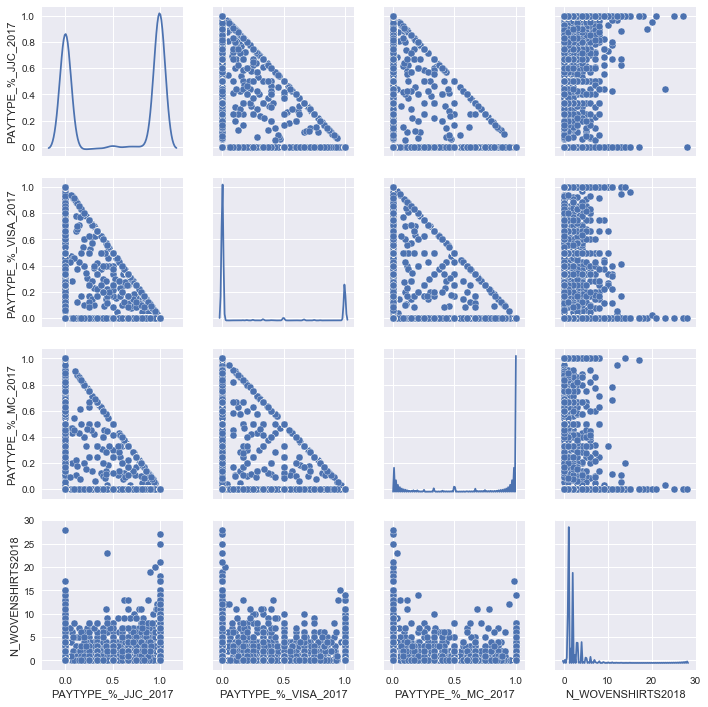

In [19]:
fts = CATEG_FTS[18:21]+['N_WOVENSHIRTS2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,PAYTYPE_%_AMEX_2017,PAYTYPE_%_DISC_2017,PAYTYPE_%_DEBIT_2017,N_WOVENSHIRTS2018
PAYTYPE_%_AMEX_2017,1.000000,-0.033750,-0.039824,-0.017134
PAYTYPE_%_DISC_2017,-0.033750,1.000000,-0.019125,-0.011311
PAYTYPE_%_DEBIT_2017,-0.039824,-0.019125,1.000000,-0.021494
N_WOVENSHIRTS2018,-0.017134,-0.011311,-0.021494,1.000000


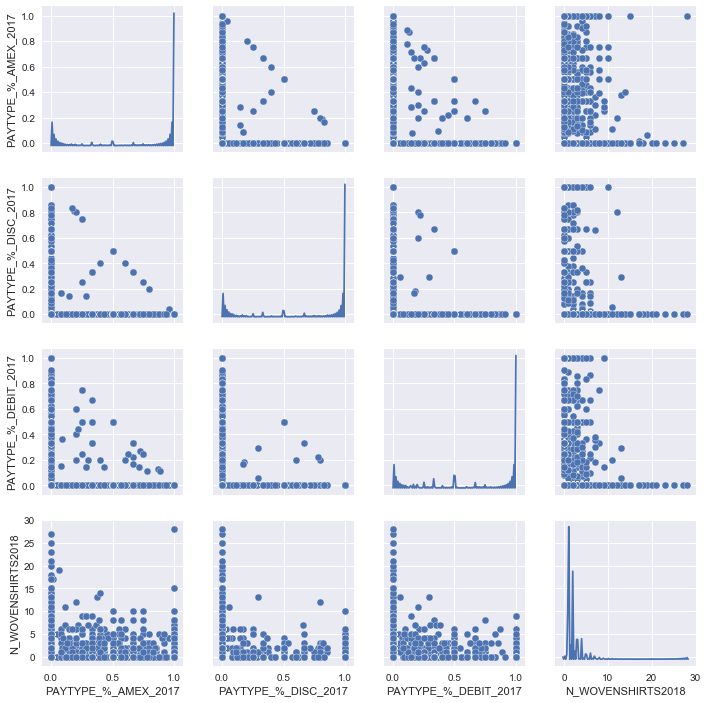

In [20]:
fts = CATEG_FTS[21:24]+['N_WOVENSHIRTS2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,PAYTYPE_%_CASH_2017,PAYTYPE_%_CK_2017,PAYTYPE_%_OTHER_2017,N_WOVENSHIRTS2018
PAYTYPE_%_CASH_2017,1.000000,0.007958,-0.007581,-0.013074
PAYTYPE_%_CK_2017,0.007958,1.000000,-0.000805,-0.003672
PAYTYPE_%_OTHER_2017,-0.007581,-0.000805,1.000000,-0.009489
N_WOVENSHIRTS2018,-0.013074,-0.003672,-0.009489,1.000000


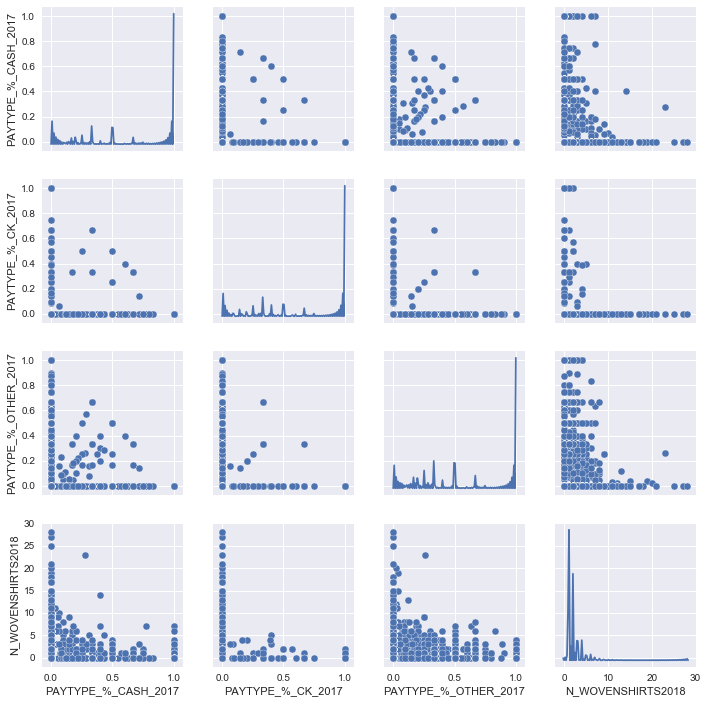

In [21]:
fts = CATEG_FTS[24:27]+['N_WOVENSHIRTS2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,FABRICCATEGORY_%_COTTON/COTTONBL_2017,FABRICCATEGORY_%_SYNTHETIC/SYNBLEND_2017,FABRICCATEGORY_%_LINEN/LINENBL_2017,N_WOVENSHIRTS2018
FABRICCATEGORY_%_COTTON/COTTONBL_2017,1.000000,-0.160360,-0.277084,0.007410
FABRICCATEGORY_%_SYNTHETIC/SYNBLEND_2017,-0.160360,1.000000,-0.225032,-0.004596
FABRICCATEGORY_%_LINEN/LINENBL_2017,-0.277084,-0.225032,1.000000,-0.012546
N_WOVENSHIRTS2018,0.007410,-0.004596,-0.012546,1.000000


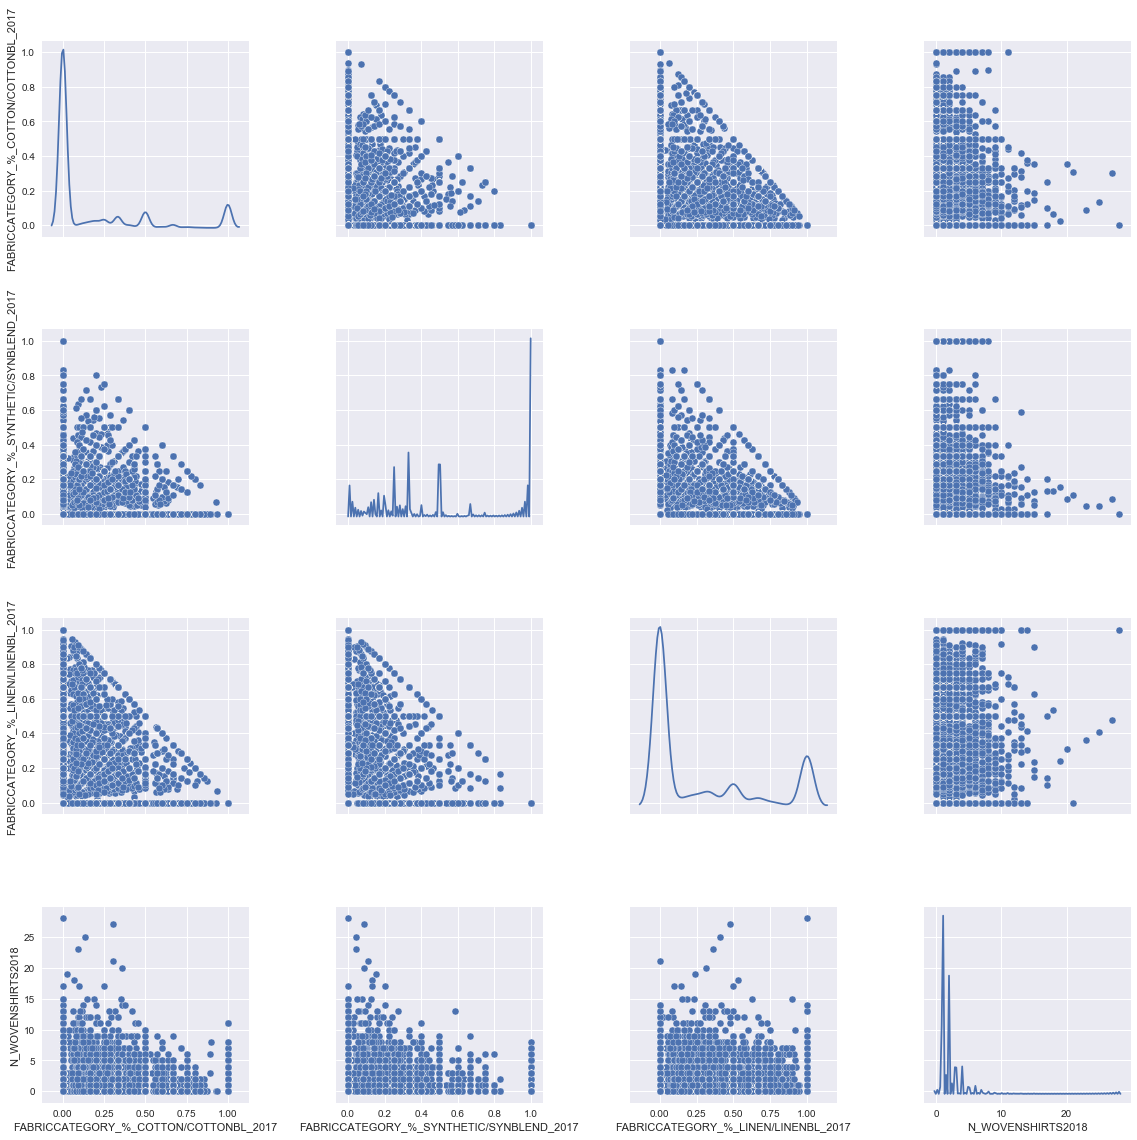

In [22]:
fts = CATEG_FTS[27:30]+['N_WOVENSHIRTS2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde',size=4);